In [1]:
import os
import time
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dense, Input, InputLayer,Dropout
from tensorflow.keras.optimizers import Adam,SGD


**Loading dataframe**

In [2]:
'Load dataframe from csv file'
df = pd.read_csv('breast_cancer.csv',header=0)

In [3]:
'Check for class imbalance'
a = df['diagnosis']
M = [1 for x in a if x=='M']
B = [1 for x in a if x=='B']
print('Malignant:',len(M), 'and Benign:',len(B))

Malignant: 212 and Benign: 357


**Here we simply eliminate every feature (row) that has a missing/zero value**  
**In other word we are only considering patients of whom we have full information**

In [4]:
'Drop columns where ALL values are NaN'
df_post = df.dropna(axis=1,how='all')

'Drop rows with zeros'
df_post = df_post.drop(np.where(df == 0)[0])

### These two steps seem to be not neccesary for this dataset
#'Drop all columns where ALL values are 0'
#'Drop rows with NaNs'


'Check if zeros (isnull) or NaNs(isnull) are present in df'
if df_post.isin([0]).sum().any() == False and df_post.isnull().sum().any() == False:
    print('No NaNs No Zeros')
elif df_post.isin([0]).sum(axis=1).any() == True:
    print('Still Zeros')
elif df_post.isnull().sum().any() == True:
    print('Still NaNs')
elif df_post.isin([0]).sum().any() == True and df_post.isnull().sum().any() == True:
    print('Both zeros and NaNs present')


No NaNs No Zeros


**It is intersting to see to which categories the insufficient data belongs to**  
**This might reveal problems in the information gathering process**

In [5]:
'Check for class imbalance'
M = [1 for x in df['diagnosis'] if x=='M']
B = [1 for x in df['diagnosis'] if x=='B']
M_post = [1 for x in df_post['diagnosis'] if x=='M']
B_post = [1 for x in df_post['diagnosis'] if x=='B']
print(len(df) - len(df_post),' patients excluded, due to insufficient information of their cancer cell sample')
print(len(M)-len(M_post),'of them had malignant diagnosis and',len(B)-len(B_post),'had benign diagnosis')


13  patients excluded, due to insufficient information of their cancer cell sample
0 of them had malignant diagnosis and 13 had benign diagnosis


**Convert Diagnosis column into categorical**

In [6]:
df_post['diagnosis'] = pd.Categorical(df_post['diagnosis'])
df_post['diagnosis'] = df_post.diagnosis.cat.codes


**Shuffle the data set and split to train/test**

In [7]:
'Split and shuffle'
df_train, df_test = train_test_split(df_post,
                                    train_size=0.8,
                                    shuffle=True,
                                    random_state=42)

'Drop IDs'
id_train = df_train['id']
id_test = df_test['id']
df_train = df_train.drop(['id'],axis=1)
df_test = df_test.drop(['id'],axis=1)

'Drop diagnosis - Split targets from data set'
diagnosis_train = df_train['diagnosis']
diagnosis_test = df_test['diagnosis']
df_train = df_train.drop(['diagnosis'],axis=1)
df_test = df_test.drop(['diagnosis'],axis=1)

In [8]:
# 'Normalization'
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_df_train = scaler.fit_transform(df_train)
# scaled_df_test = scaler.fit_transform(df_test)
# scaled_df_train.shape

In [9]:
'Define model'
dim1,dim2 = df_train.shape
model = Sequential([
    InputLayer(input_shape=(dim2,)),
    Dense(units=32,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model_summary = model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [10]:
'Compile model'
model.compile(optimizer = Adam(learning_rate = 3.5e-4),
              loss = 'BinaryCrossentropy')

Epoch 1/50
13/13 [==============================] - 0s 12ms/step - loss: 44.6104 - accuracy: 0.6441 - val_loss: 29.9093 - val_accuracy: 0.6000
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 13.5965 - accuracy: 0.5589 - val_loss: 7.7736 - val_accuracy: 0.3111
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 8.5769 - accuracy: 0.3133 - val_loss: 5.5108 - val_accuracy: 0.3111
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 3.6781 - accuracy: 0.4887 - val_loss: 2.4635 - val_accuracy: 0.5778
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 1.8016 - accuracy: 0.5238 - val_loss: 1.5394 - val_accuracy: 0.6889
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.9435 - accuracy: 0.7594 - val_loss: 0.7485 - val_accuracy: 0.7778
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.8296 - val_loss: 0.5001 - val_accuracy: 0.8000
Epoch 8/50
13/13

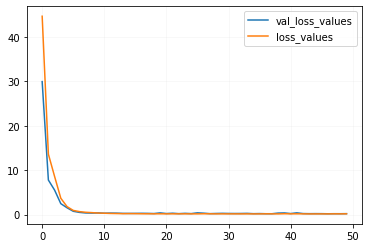

In [11]:
model.compile(optimizer = Adam(learning_rate = 3.5e-4),
              loss = 'BinaryCrossentropy',
              metrics = ['accuracy']
)

history = model.fit(df_train,diagnosis_train,
                   batch_size=32,
                   validation_split=0.1,
                   epochs=50,
                   shuffle=True,
                   verbose=1)

history_dict=history.history
#accuracy=history_dict['accuracy']
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

plt.plot(val_loss_values,label='val_loss_values')
#plt.plot(accuracy,label='accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy [a.u.]')
plt.legend()
plt.grid(alpha=0.1)

plt.plot(loss_values,label='loss_values')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy [a.u.]')
plt.legend()
plt.grid(alpha=0.1)




In [12]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[56  4]
 [ 6 46]]


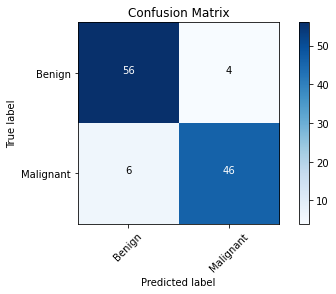

In [13]:
p = (model.predict(df_test) > 0.5).astype("int32")
cm = confusion_matrix(y_true=diagnosis_test,y_pred=p)

cm_plot_labels = ['Benign','Malignant']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [14]:
print(classification_report(diagnosis_test, p))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.92      0.88      0.90        52

    accuracy                           0.91       112
   macro avg       0.91      0.91      0.91       112
weighted avg       0.91      0.91      0.91       112

